# k-means is used for image compression

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

### find_closest_centroids

In [25]:
def find_closest_centroids(X, centroids):
    """
    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """
    m = X.shape[0]
    K = centroids.shape[0]
    idx = np.zeros(m, dtype=int)

    for i in range(m):
        distance = []
        for j in range(K):
            dist = np.linalg.norm(X[i] - centroids[j])
            distance.append(dist)
        idx[i] = np.argmin(distance)
    return idx

### import image

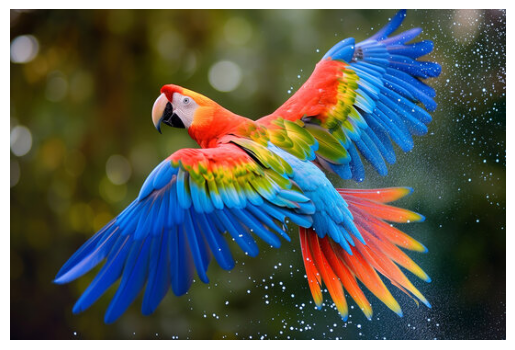

In [26]:
img = cv.imread('./images/Parrot.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

### Prepare data

In [27]:
pixels = img.reshape(-1, 3)  # Reshape to (m, 3)
pixels = pixels.astype(np.float32)  # Convert to float32 for k-means
pixels.shape

(194400, 3)

### Initialize centroids randomly

In [28]:
K = 16  # number of colors
np.random.seed(42)
random_idx = np.random.choice(pixels.shape[0], K, replace=False)
initial_centroids = pixels[random_idx]

### Find closest centroids using initial_centroids

In [29]:
idx = find_closest_centroids(pixels, initial_centroids)

print("Closest centroids for first 10 pixels:", idx[:10])

Closest centroids for first 10 pixels: [9 0 0 0 0 0 0 0 0 0]


## Computing centroid means

In [30]:
def compute_centroids(X, idx, K):
    """
    Args:
        X (ndarray): (m, n) Input values
        idx (array_like): (m,) closest centroids
        K (int): number of centroids

    Returns:
        centroids (ndarray): (K, n) new centroids

    """
    m, n = X.shape
    centroids = np.zeros((K, n))

    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)
    return centroids

## K-means on a sample dataset

In [32]:
def run_KMeans(X, initial_centroids, max_iters=10):
    """
    Args:
        X (ndarray): (m, n) Input values
        initial_centroids (ndarray): (K, n) Initial centroids
        max_iters (int): Maximum number of iterations

    Returns:
        centroids (ndarray): (K, n) final centroids
        idx (array_like): (m,) closest centroids

    """
    centroids = initial_centroids.copy()

    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, centroids.shape[0])

    return centroids, idx

In [33]:
# Run K-Means
centroids, idx = run_KMeans(pixels, initial_centroids,10)

In [34]:
centroids

array([[101.33841705, 105.96974182,  70.08182526],
       [140.68696594, 137.02296448, 130.83039856],
       [233.01272583,  69.43173218,  32.60814285],
       [239.61767578, 140.02203369,  96.12322998],
       [ 89.84133911,  85.58890533,  20.28544807],
       [ 19.38484001,  53.36546707, 102.16996765],
       [ 19.71486855,  25.09889412,  16.40736389],
       [  7.10771084,  68.86334229, 165.52418518],
       [ 45.05236816,  41.23632812,  11.34063816],
       [ 67.79322815,  77.47062683,  53.61292267],
       [142.47947693, 185.85696411, 227.58880615],
       [175.42651367, 158.65249634,  23.44820786],
       [ 25.31576347, 129.27236938, 214.9956665 ],
       [ 70.05172729,  97.64372253, 116.35024261],
       [ 67.32281494,  58.88322449,  12.18449783],
       [ 38.81564331,  53.73875427,  41.92819595]])

## Random initialization

### Define a cost function

In [35]:
def cost_function(X, centroids, idx):
    """
    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids
        idx (array_like): (m,) closest centroids

    Returns:
        cost (float): Total cost of the clustering

    """
    m = X.shape[0]
    K = centroids.shape[0]
    cost = 0.0

    for i in range(m):
        cost += np.linalg.norm(X[i] - centroids[idx[i]]) ** 2
    return cost / m